In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('C:/Users/ABC/OneDrive/Desktop/GitHub_Project/Real_estate_project/properties.csv')
dataset.head()

,ID,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Approved Authority Name,Units Available,Price,Price (English),...,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Possession By,NRI Pref,Land Area / Covered Area,Land Area Unit,Pantry Type
0,12685,Under Construction,Dec '25,5,N,NaN,KDMC,1.0,3150000.0,31.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
1,12684,Ready to Move,NaN,20,Y,TATA Housing Development Company Ltd.,TMC,10.0,6300000.0,63 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
2,12683,Ready to Move,NaN,18,N,Sai Satyam Developers,KDMC,0.0,5400000.0,54 Lac,...,1,1,1,1,1,NaN,Y,NaN,NaN,NaN
3,12682,Under Construction,Dec '25,5,N,Birla Estates,KDMC,70.0,9000000.0,90 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN
4,12681,Under Construction,Dec '24,8,Y,Godrej Properties,NaN,NaN,4950000.0,49.5 Lac,...,1,1,1,1,1,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.columns

Index(['ID', 'Possession Status', 'Availability Starts From', 'Floor No',
       'Commercial', 'Developer', 'Approved Authority Name', 'Units Available',
       'Price', 'Price (English)',
       ...
       'Rentable CommuniPfty Space', 'Retail Boulevard (Retail Shops)',
       'Cycling & Jogging Track', 'Fire Fighting Equipment',
       'Aesthetically designed landscape garden', 'Possession By', 'NRI Pref',
       'Land Area / Covered Area', 'Land Area Unit', 'Pantry Type'],
      dtype='object', length=145)

In [4]:
columns_to_drop = np.arange(48, 144)
dataset.drop(dataset.columns[columns_to_drop], axis=1, inplace=True)

In [5]:
dataset.columns

Index(['ID', 'Possession Status', 'Availability Starts From', 'Floor No',
       'Commercial', 'Developer', 'Approved Authority Name', 'Units Available',
       'Price', 'Price (English)', 'Flooring Type', 'Electricity Status',
       'Maintenance Type', 'Maintenance Charges', 'Booking Amount', 'Landmark',
       'Covered Area', 'Project Name', 'sqft Price ', 'Carpet Area',
       'Area Name', 'Property Uniqueness', 'Unit of Carpet Area', 'Society',
       'Ownership Type', 'furnished Type', 'Bathroom', 'Parking', 'Facing',
       'Amenities Facing', 'Transaction Type', 'Floor Data',
       'Type of Property', 'City', 'bedroom', 'Data Referred From', 'floors',
       'Water Status', 'Luxury Flat', 'Covered Area.1', 'Carpet Area Unit',
       'isPrimeLocationProperty', 'Tenants Preference', 'Location', 'Property',
       'covArea Unit', 'isLuxuryServiceProvided', 'Property Lifespan',
       'Pantry Type'],
      dtype='object')

In [6]:
columns_to_drop = ['ID', 'Possession Status', 'Availability Starts From', 'Floor No', 'Developer', 'Approved Authority Name', 
                   'Units Available', 'Price (English)', 'Flooring Type', 'Electricity Status', 'Maintenance Type', 
                   'Maintenance Charges', 'Booking Amount', 'Landmark', 'Project Name', 'Area Name', 'Property Uniqueness', 
                   'Unit of Carpet Area', 'Society', 'Ownership Type', 'Parking', 'Facing', 'Amenities Facing', 'Floor Data', 
                  'bedroom', 'Data Referred From', 'floors', 'Water Status', 'Luxury Flat', 'Carpet Area Unit', 'Tenants Preference',
                  'covArea Unit', 'isLuxuryServiceProvided', 'Property Lifespan', 'Pantry Type', 'Covered Area.1']

In [7]:
dataset.drop(columns_to_drop, axis=1, inplace=True)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commercial               12685 non-null  object 
 1   Price                    12601 non-null  float64
 2   Covered Area             11374 non-null  float64
 3   sqft Price               11480 non-null  float64
 4   Carpet Area              10133 non-null  float64
 5   furnished Type           12608 non-null  object 
 6   Bathroom                 12616 non-null  float64
 7   Transaction Type         12685 non-null  object 
 8   Type of Property         12685 non-null  object 
 9   City                     12685 non-null  object 
 10  isPrimeLocationProperty  12685 non-null  object 
 11  Location                 12362 non-null  object 
 12  Property                 12362 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.3+ MB


In [9]:
dataset.isnull().sum()

Commercial                    0
Price                        84
Covered Area               1311
sqft Price                 1205
Carpet Area                2552
furnished Type               77
Bathroom                     69
Transaction Type              0
Type of Property              0
City                          0
isPrimeLocationProperty       0
Location                    323
Property                    323
dtype: int64

In [10]:
df1 = dataset.drop('Carpet Area', axis=1)
df1.dropna(inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10984 entries, 0 to 12684
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commercial               10984 non-null  object 
 1   Price                    10984 non-null  float64
 2   Covered Area             10984 non-null  float64
 3   sqft Price               10984 non-null  float64
 4   furnished Type           10984 non-null  object 
 5   Bathroom                 10984 non-null  float64
 6   Transaction Type         10984 non-null  object 
 7   Type of Property         10984 non-null  object 
 8   City                     10984 non-null  object 
 9   isPrimeLocationProperty  10984 non-null  object 
 10  Location                 10984 non-null  object 
 11  Property                 10984 non-null  object 
dtypes: float64(4), object(8)
memory usage: 1.1+ MB


In [12]:
df1['City'].unique()

array(['Thane', 'Kalyan', 'Mumbai', 'Agartala', 'Palghar', 'Bhiwandi',
       'Gurgaon', 'Nagpur', 'Hyderabad'], dtype=object)

In [13]:
cities_to_drop = ['Agartala', 'Gurgaon', 'Nagpur', 'Hyderabad']

In [14]:
df2 = df1.drop(df1[df1['City'].isin(cities_to_drop)].index)

In [15]:
df2.shape

(10974, 12)

In [16]:
df2['Property'].value_counts()

Property
2 BHK Flat    4340
1 BHK Flat    3855
3 BHK Flat    2093
4 BHK Flat     565
5 BHK Flat      95
6 BHK Flat      26
Name: count, dtype: int64

In [17]:
def property_split(data):
    return data.split(' ')[0]

In [18]:
df2['BHK'] = df2['Property'].apply(property_split)

In [19]:
df2.drop('Property', axis=1, inplace=True)
df2.drop('City', axis=1, inplace=True)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10974 entries, 0 to 12684
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Commercial               10974 non-null  object 
 1   Price                    10974 non-null  float64
 2   Covered Area             10974 non-null  float64
 3   sqft Price               10974 non-null  float64
 4   furnished Type           10974 non-null  object 
 5   Bathroom                 10974 non-null  float64
 6   Transaction Type         10974 non-null  object 
 7   Type of Property         10974 non-null  object 
 8   isPrimeLocationProperty  10974 non-null  object 
 9   Location                 10974 non-null  object 
 10  BHK                      10974 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1.0+ MB


In [21]:
commercial_dataset = pd.get_dummies(df2['Commercial']).replace({False: 0, True: 1})
df3 = df2.join(commercial_dataset)
df3.drop(['Commercial', 'N', 'Y'], axis=1, inplace=True)
del commercial_dataset

In [22]:
df3.head(10)

,Price,Covered Area,sqft Price,furnished Type,Bathroom,Transaction Type,Type of Property,isPrimeLocationProperty,Location,BHK
0,3150000.0,635.0,4960.0,Unfurnished,2.0,New Property,Apartment,Y,"Kalyan West, Thane",1
1,6300000.0,579.0,10880.0,Unfurnished,2.0,New Property,Apartment,Y,"Kalyan West, Thane",2
2,5400000.0,850.0,6352.0,Unfurnished,2.0,New Property,Apartment,Y,"Kalyan West, Thane",2
3,9000000.0,1050.0,8571.0,Unfurnished,2.0,New Property,Apartment,Y,"Kalyan West, Thane",2
4,4950000.0,561.0,8824.0,Semi-Furnished,2.0,New Property,Apartment,Y,"Kalyan West, Thane",1
5,6570000.0,1067.0,6157.0,Unfurnished,2.0,New Property,Apartment,Y,"Kalyan West, Thane",2
6,5500000.0,725.0,7586.0,Unfurnished,2.0,Resale,Apartment,Y,"Kalyan West, Thane",2
7,4200000.0,650.0,6462.0,Semi-Furnished,1.0,Resale,Apartment,Y,"Kalyan West, Thane",1
8,3449000.0,592.0,5826.0,Unfurnished,1.0,New Property,Apartment,Y,"Kalyan West, Thane",1
9,5000000.0,644.0,7764.0,Unfurnished,1.0,Resale,Apartment,Y,"Kalyan West, Thane",1


In [23]:
index = np.arange(0, df3.shape[0])
df3.set_index(index, inplace=True)

In [24]:
df3['furnished Type'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [25]:
furnished_type_data = pd.get_dummies(df3['furnished Type']).replace({False: 0, True: 1})
df4 = df3.join(furnished_type_data)
df4.drop('furnished Type', axis=1, inplace=True)
df4.head(10)

,Price,Covered Area,sqft Price,Bathroom,Transaction Type,Type of Property,isPrimeLocationProperty,Location,BHK,Furnished,Semi-Furnished,Unfurnished
0,3150000.0,635.0,4960.0,2.0,New Property,Apartment,Y,"Kalyan West, Thane",1,0,0,1
1,6300000.0,579.0,10880.0,2.0,New Property,Apartment,Y,"Kalyan West, Thane",2,0,0,1
2,5400000.0,850.0,6352.0,2.0,New Property,Apartment,Y,"Kalyan West, Thane",2,0,0,1
3,9000000.0,1050.0,8571.0,2.0,New Property,Apartment,Y,"Kalyan West, Thane",2,0,0,1
4,4950000.0,561.0,8824.0,2.0,New Property,Apartment,Y,"Kalyan West, Thane",1,0,1,0
5,6570000.0,1067.0,6157.0,2.0,New Property,Apartment,Y,"Kalyan West, Thane",2,0,0,1
6,5500000.0,725.0,7586.0,2.0,Resale,Apartment,Y,"Kalyan West, Thane",2,0,0,1
7,4200000.0,650.0,6462.0,1.0,Resale,Apartment,Y,"Kalyan West, Thane",1,0,1,0
8,3449000.0,592.0,5826.0,1.0,New Property,Apartment,Y,"Kalyan West, Thane",1,0,0,1
9,5000000.0,644.0,7764.0,1.0,Resale,Apartment,Y,"Kalyan West, Thane",1,0,0,1


In [26]:
prime_location_data = pd.get_dummies(df4['isPrimeLocationProperty']).replace({False:0, True: 1})
df5 = df4.join(prime_location_data)

In [27]:
df5.drop('isPrimeLocationProperty', axis=1, inplace=True)
df5.rename(columns={'N': 'Not_primelocation', 'Y': 'Primelocation'}, inplace=True)
df5.head(10)

,Price,Covered Area,sqft Price,Bathroom,Transaction Type,Type of Property,Location,BHK,Furnished,Semi-Furnished,Unfurnished,Not_primelocation,Primelocation
0,3150000.0,635.0,4960.0,2.0,New Property,Apartment,"Kalyan West, Thane",1,0,0,1,0,1
1,6300000.0,579.0,10880.0,2.0,New Property,Apartment,"Kalyan West, Thane",2,0,0,1,0,1
2,5400000.0,850.0,6352.0,2.0,New Property,Apartment,"Kalyan West, Thane",2,0,0,1,0,1
3,9000000.0,1050.0,8571.0,2.0,New Property,Apartment,"Kalyan West, Thane",2,0,0,1,0,1
4,4950000.0,561.0,8824.0,2.0,New Property,Apartment,"Kalyan West, Thane",1,0,1,0,0,1
5,6570000.0,1067.0,6157.0,2.0,New Property,Apartment,"Kalyan West, Thane",2,0,0,1,0,1
6,5500000.0,725.0,7586.0,2.0,Resale,Apartment,"Kalyan West, Thane",2,0,0,1,0,1
7,4200000.0,650.0,6462.0,1.0,Resale,Apartment,"Kalyan West, Thane",1,0,1,0,0,1
8,3449000.0,592.0,5826.0,1.0,New Property,Apartment,"Kalyan West, Thane",1,0,0,1,0,1
9,5000000.0,644.0,7764.0,1.0,Resale,Apartment,"Kalyan West, Thane",1,0,0,1,0,1


In [28]:
df5['Type of Property'].value_counts()

Type of Property
Apartment                  10748
Builder Floor Apartment      197
Penthouse                     29
Name: count, dtype: int64

In [29]:
property_type = pd.get_dummies(df5['Type of Property']).replace({False: 0, True: 1})
df6 = df5.join(property_type)
df6.drop('Type of Property', axis=1, inplace=True)
df6.head(7)

,Price,Covered Area,sqft Price,Bathroom,Transaction Type,Location,BHK,Furnished,Semi-Furnished,Unfurnished,Not_primelocation,Primelocation,Apartment,Builder Floor Apartment,Penthouse
0,3150000.0,635.0,4960.0,2.0,New Property,"Kalyan West, Thane",1,0,0,1,0,1,1,0,0
1,6300000.0,579.0,10880.0,2.0,New Property,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0
2,5400000.0,850.0,6352.0,2.0,New Property,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0
3,9000000.0,1050.0,8571.0,2.0,New Property,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0
4,4950000.0,561.0,8824.0,2.0,New Property,"Kalyan West, Thane",1,0,1,0,0,1,1,0,0
5,6570000.0,1067.0,6157.0,2.0,New Property,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0
6,5500000.0,725.0,7586.0,2.0,Resale,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0


In [30]:
df6['Transaction Type'].value_counts()

Transaction Type
Resale          7415
New Property    3552
Rent/Lease         4
Rent               2
Other              1
Name: count, dtype: int64

In [31]:
transact_type = ['Other', 'Rent', 'Rent/Lease']
df6.drop(df6[df6['Transaction Type'].isin(transact_type)].index, inplace=True)

In [32]:
transact_type_data = pd.get_dummies(df6['Transaction Type']).replace({False: 0, True: 1})
df7 = df6.join(transact_type_data)
df7.head(7)

,Price,Covered Area,sqft Price,Bathroom,Transaction Type,Location,BHK,Furnished,Semi-Furnished,Unfurnished,Not_primelocation,Primelocation,Apartment,Builder Floor Apartment,Penthouse,New Property,Resale
0,3150000.0,635.0,4960.0,2.0,New Property,"Kalyan West, Thane",1,0,0,1,0,1,1,0,0,1,0
1,6300000.0,579.0,10880.0,2.0,New Property,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0,1,0
2,5400000.0,850.0,6352.0,2.0,New Property,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0,1,0
3,9000000.0,1050.0,8571.0,2.0,New Property,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0,1,0
4,4950000.0,561.0,8824.0,2.0,New Property,"Kalyan West, Thane",1,0,1,0,0,1,1,0,0,1,0
5,6570000.0,1067.0,6157.0,2.0,New Property,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0,1,0
6,5500000.0,725.0,7586.0,2.0,Resale,"Kalyan West, Thane",2,0,0,1,0,1,1,0,0,0,1


In [33]:
df7.drop('Transaction Type', axis=1, inplace=True)

In [34]:
df7['Location'] = df7['Location'].str.strip()
location_data = df7['Location'].value_counts()

In [35]:
location_data = location_data[location_data < 5]

In [36]:
def feature_other(data):
    if data in location_data:
        return 'Others'
    else:
        return data

In [37]:
df7['Location'] = df7['Location'].apply(feature_other)

In [38]:
df7['Location'].value_counts()

Location
Dombivli East, Thane        590
Andheri West, Mumbai        439
Malad East, Mumbai          412
Thane West, Thane           385
Andheri East, Mumbai        372
                           ... 
Mahim East, Mumbai            5
Alika Nagar, Mumbai           5
Khar Danda, Mumbai            5
Charkop Sector 9, Mumbai      5
Hanuman Nagar, Mumbai         5
Name: count, Length: 183, dtype: int64

In [39]:
df7['sqft Price '].describe()

count    1.096700e+04
mean     2.238228e+04
std      3.260328e+05
min      0.000000e+00
25%      1.003800e+04
50%      1.632600e+04
75%      2.442500e+04
max      3.400000e+07
Name: sqft Price , dtype: float64

In [40]:
df7['BHK'] = df7['BHK'].astype(np.float64)

In [41]:
df7.drop(df7[df7['Covered Area'] / df7['BHK'] < 290].index, inplace=True)

In [42]:
df7.shape

(10699, 16)

In [43]:
def remove_outliers(data):
    result_dataframe = pd.DataFrame()
    for key, value in data.groupby('Location'):
        mn = np.mean(value['sqft Price '])
        st = np.std(value['sqft Price '])
        dataframe = value[(value['sqft Price '] > (mn -st)) & (value['sqft Price '] <= (mn+st))]
        result_dataframe = pd.concat([result_dataframe, dataframe], ignore_index=True)
    return result_dataframe

In [44]:
df8 = remove_outliers(df7)

In [45]:
df8.shape

(7991, 16)

In [46]:
df8.drop(df8[df8['Bathroom'] > df8['BHK'] + 1].index, inplace=True)
df8['Price'] = df8['Price'] / 100000

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 15))

def loction_outliers_scatter(data_frame, location):
    new_dataset = data_frame[data_frame['Location'] == location]
    one_bhk = new_dataset[new_dataset['BHK'] == 1.0]
    two_bhk = new_dataset[new_dataset['BHK'] == 2.0]
    three_bhk = new_dataset[new_dataset['BHK'] == 3.0]
    four_bhk = new_dataset[new_dataset['BHK'] == 4.0]
    plt.scatter(one_bhk['Covered Area'], one_bhk['Price'], color='blue', marker='x', label='1 BHK')
    plt.scatter(two_bhk['Covered Area'], two_bhk['Price'], color='green', marker='.', label='2 BHK')
    plt.scatter(three_bhk['Covered Area'], three_bhk['Price'], color='red', marker='o', label='3 BHK')
    plt.axvline(np.mean(one_bhk['Covered Area']), color='yellow', label='1 BHK')
    plt.axvline(np.mean(two_bhk['Covered Area']), color='black', label='2 BHK')
    plt.axvline(np.mean(three_bhk['Covered Area']), color='purple', label='3 BHK')
    plt.legend()
    plt.xlabel('Covered Area')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

<Figure size 1000x1500 with 0 Axes>

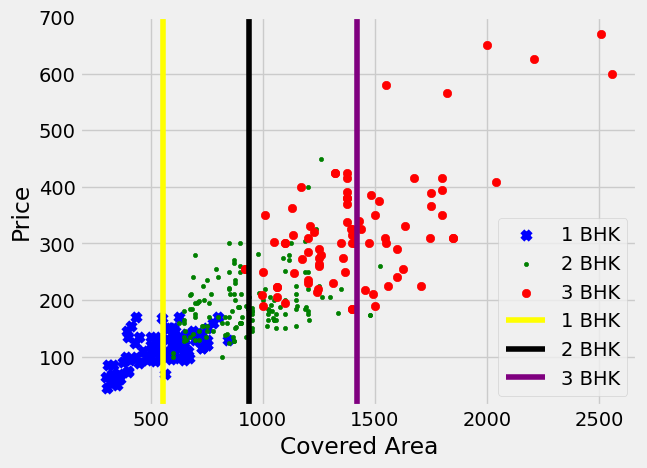

In [48]:
loction_outliers_scatter(df8, 'Andheri East, Mumbai')

In [49]:
outlier_dataset = df8.groupby(['Location', 'BHK'])['sqft Price '].agg(['mean', 'std', 'count'])

In [50]:
outlier_dataset.head(10)

mean          std  count
Location                  BHK                                  
4 Bunglows, Mumbai        2.0  21875.000000          NaN      1
                          3.0  31152.400000  4543.776106      5
Aarey Milk Colony, Mumbai 1.0   7823.400000  1558.230663      5
                          2.0   9197.600000  1696.520793      5
                          3.0   7979.000000          NaN      1
Agashi, Mumbai            1.0   5202.750000  1188.613864      4
                          2.0   4487.000000   606.649817      4
                          3.0   5155.000000          NaN      1
Agripada, Mumbai          1.0  26193.400000  4776.108332      5
                          2.0  25800.333333  2908.012249     15

In [51]:
def remove_outliers(data_frame):
    remove_index = np.array([])
    for location_key, location_value in data_frame.groupby('Location'):
        new_dict = dict()
        for bhk_key, bhk_value in location_value.groupby('BHK'):
            new_dict[bhk_key] ={
                'mean' : np.mean(bhk_value['sqft Price ']),
                'std' : np.std(bhk_value['sqft Price ']),
                'count': bhk_value.shape[0]
            }
        for bhk_key, bhk_value in location_value.groupby('BHK'):
            returned_data = new_dict.get(bhk_key -1)
            if returned_data and returned_data['count'] > 5:
                remove_index = np.append(remove_index, bhk_value[bhk_value['sqft Price '] < returned_data['mean']].index.values)
    return data_frame.drop(remove_index)

In [52]:
df9 = remove_outliers(df8)

In [53]:
df9.shape

(5950, 16)

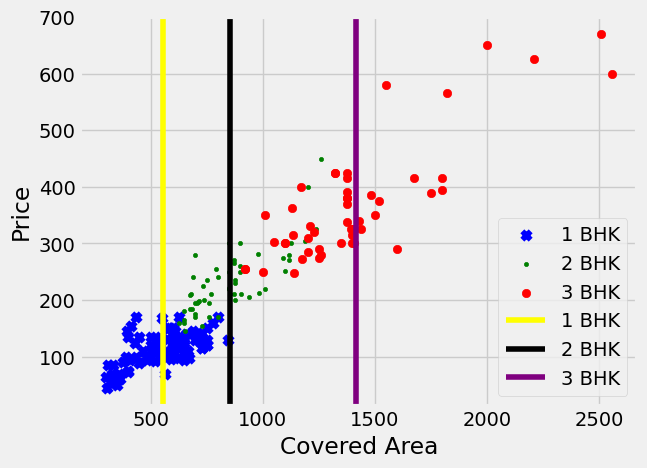

In [54]:
loction_outliers_scatter(df9, 'Andheri East, Mumbai')

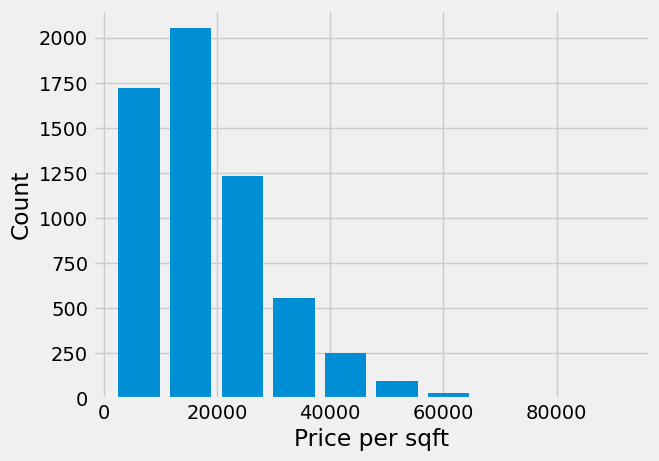

In [55]:
plt.hist(df9['sqft Price '], rwidth = 0.8)
plt.xlabel('Price per sqft')
plt.ylabel('Count')

plt.show()

In [56]:
location_data = pd.get_dummies(df9['Location'])
location_data.drop('Others', axis=1, inplace=True)

In [57]:
location_data.replace({False: 0, True: 1}, inplace=True)
df10 = df9.join(location_data)

In [58]:
index = np.arange(0, df10.shape[0])

In [59]:
df10.index = index

In [60]:
df10.drop(['Location', 'sqft Price '], axis=1, inplace=True)
df10.head(7)

,Price,Covered Area,Bathroom,BHK,Furnished,Semi-Furnished,Unfurnished,Not_primelocation,Primelocation,Apartment,...,"Versova Marg, Mumbai","Vile Parle East, Mumbai","Vile Parle West, Mumbai","Virar East, Mumbai","Virar West, Mumbai","Vishnu Nagar, Thane","Vrindavan Society, Thane","Waghbil, Thane","Wagle Industrial Estate, Thane","Y K Nagar, Mumbai"
0,655.0,1897.0,4.0,3.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,655.0,1897.0,4.0,3.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,400.0,1700.0,3.0,3.0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,210.0,960.0,3.0,2.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,575.0,1775.0,3.0,3.0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,495.0,1608.0,3.0,3.0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,100.0,1080.0,2.0,2.0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
X = df10.drop('Price', axis=1)
X.head()

,Covered Area,Bathroom,BHK,Furnished,Semi-Furnished,Unfurnished,Not_primelocation,Primelocation,Apartment,Builder Floor Apartment,...,"Versova Marg, Mumbai","Vile Parle East, Mumbai","Vile Parle West, Mumbai","Virar East, Mumbai","Virar West, Mumbai","Vishnu Nagar, Thane","Vrindavan Society, Thane","Waghbil, Thane","Wagle Industrial Estate, Thane","Y K Nagar, Mumbai"
0,1897.0,4.0,3.0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1897.0,4.0,3.0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1700.0,3.0,3.0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,960.0,3.0,2.0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1775.0,3.0,3.0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
Y = df10['Price']
Y.head()

0    655.0
1    655.0
2    400.0
3    210.0
4    575.0
Name: Price, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.9006811758483052

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.90111156, 0.90675785, 0.91742404, 0.90134426, 0.90395658])

In [66]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model(x, y):
    models = {
    'DecisionTreeRegressor' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'splitter' : ['best', 'random'],
            'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
        }
    },   
    'Lasso' : {
        'model': Lasso(),
        'params' : {
            'selection' : ['cyclic', 'random'],
            'alpha' : [1, 2]
        }
    }
}
        
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for model_name, model_values in models.items():
        grid_search_cv = GridSearchCV(model_values['model'], param_grid=model_values['params'], cv=cv, return_train_score=False)
        grid_search_cv.fit(X, Y)
        scores.append({
            'model_name': model_name,
            'best score' : grid_search_cv.best_score_,
            'best params' : grid_search_cv.best_params_
        })
    return scores

In [67]:
model_result = find_best_model(X, Y)

In [68]:
pd.DataFrame(model_result)

,model_name,best score,best params
0,DecisionTreeRegressor,0.929305,"{'criterion': 'squared_error', 'splitter': 'ra..."
1,Lasso,0.833090,"{'alpha': 1, 'selection': 'cyclic'}"


In [69]:
decision_tree = DecisionTreeRegressor(criterion='squared_error', splitter='random', random_state=10)

np.mean(cross_val_score(decision_tree, X, Y, cv=cv))

0.9279358493732783

In [70]:
X.columns[:15]

Index(['Covered Area', 'Bathroom', 'BHK', 'Furnished', 'Semi-Furnished',
       'Unfurnished', 'Not_primelocation', 'Primelocation', 'Apartment',
       'Builder Floor Apartment', 'Penthouse', 'New Property', 'Resale',
       '4 Bunglows, Mumbai', 'Aarey Milk Colony, Mumbai'],
      dtype='object')

In [91]:
def predict_price(sqft, bath_room, bhk, furnish_type, prime_location, apartment_type, property_type, location):
    values = np.zeros(len(X.columns))
    index = X.columns.get_indexer([furnish_type, prime_location, apartment_type, property_type, location])
    for i in index:
        values[i] = 1
    
    values[0] = sqft
    values[1] = bath_room
    values[2] = bhk
    return decision_tree.predict([values])[0]

In [92]:
predict_price(1000, 2, 3, 'Unfurnished', 'Primelocation', 'Apartment', 'New Property', 'Aarey Milk Colony, Mumbai')

197.8

In [94]:
predict_price(1000, 2, 2, 'Unfurnished', 'Primelocation', 'Apartment', 'New Property', 'Aarey Milk Colony, Mumbai')

185.0